In [47]:
import sys
import yaml
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np

from training.util_prepare import get_prediction_matrix
from training.util_prediction import get_coordinate_list
from evaluation.spots_predictor import SpotPredictor

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## import data

In [48]:
dataset = "../data/spots_synt_harder_e4cd83b6.npz"
with np.load(dataset, allow_pickle=True) as data:
        train_x = data["x_train"]
        valid_x = data["x_valid"]
        test_x = data["x_test"]
        train_y = data["y_train"]
        valid_y = data["y_valid"]
        test_y = data["y_test"]
filename= '../evaluation/yaml/synt_evaluation.yaml' 
with open(filename, "r") as file:
    cfg = yaml.safe_load(file)
    
predictor = SpotPredictor(cfg)

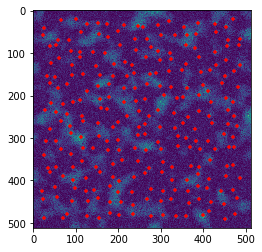

In [49]:
idx = 10

image = test_x[idx]
mask = test_y[idx]

plt.imshow(image)
coordtrue = get_coordinate_list(mask,512,128)
plt.scatter(coordtrue[...,0],coordtrue[...,1],marker="+",color='r',s=20)

## Model evaluation using gauss or neural net localisation

In [50]:
gauss_mask = predictor.gauss_predict(image)
model_mask = predictor.predict(image)

In [51]:
coordgauss = get_coordinate_list(gauss_mask,512,128)
coordmodel = get_coordinate_list(model_mask,512,128)

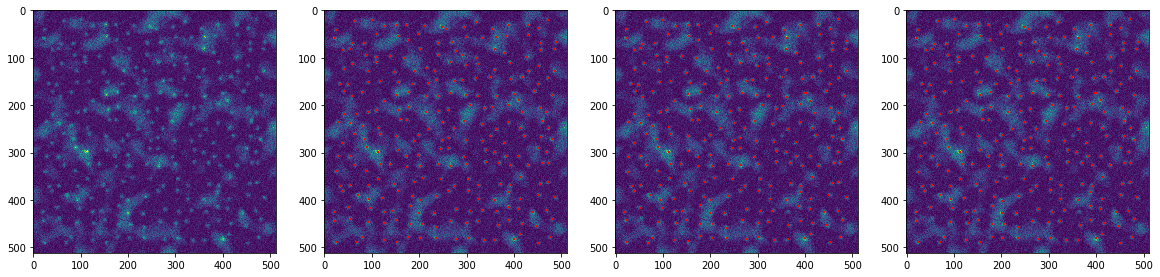

In [52]:
fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].imshow(image)

ax[1].imshow(image)
ax[1].scatter(coordtrue[...,0],coordtrue[...,1],marker="+",color='r',s=5)

ax[2].imshow(image)
ax[2].scatter(coordgauss[...,0],coordgauss[...,1],marker="+",color='r',s=5)

ax[3].imshow(image)
ax[3].scatter(coordmodel[...,0],coordmodel[...,1],marker="+",color='r',s=5)

In [ ]:
plt.figure(figsize=(40,40))
plt.imshow(image)
s = 1500
alpha = 1
plt.scatter(coordtrue[...,0],coordtrue[...,1],marker="+",color='r',s=s, alpha = alpha)
plt.scatter(coordgauss[...,0],coordgauss[...,1],marker="+",color='k',s=s, alpha = alpha)
plt.scatter(coordmodel[...,0],coordmodel[...,1],marker="+",color='y',s=s, alpha = alpha)
plt.legend(['GT','gauss','neural net'])